In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('C:/Users/vampi/Downloads/Social_Network_Ads.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Splitting dataset to training and test sets

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

array([[    35,  53000],
       [    30, 116000],
       [    25,  79000],
       [    38,  71000],
       [    45,  32000],
       [    42,  80000],
       [    60,  42000],
       [    21,  72000],
       [    36, 144000],
       [    31,  68000],
       [    29, 148000],
       [    26,  86000],
       [    19,  19000],
       [    37,  53000],
       [    38,  65000],
       [    20,  74000],
       [    32,  86000],
       [    35,  77000],
       [    48,  33000],
       [    35,  20000],
       [    42, 108000],
       [    48, 141000],
       [    47, 107000],
       [    35,  38000],
       [    27,  58000],
       [    59,  29000],
       [    19,  26000],
       [    49,  88000],
       [    20,  49000],
       [    37, 146000],
       [    53,  72000],
       [    33, 149000],
       [    47,  50000],
       [    35,  72000],
       [    27,  57000],
       [    22,  27000],
       [    29,  83000],
       [    55, 130000],
       [    23,  20000],
       [    43, 129000],


## Let us feature scale

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classifier.predict(sc.transform([[30, 87000]])))

[0]


## Predicting the test results

In [18]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [29]:
cm= confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.9125

## Visualization of data

C:\Users\vampi\AppData\Local\Temp\ipykernel_5788\3643816348.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


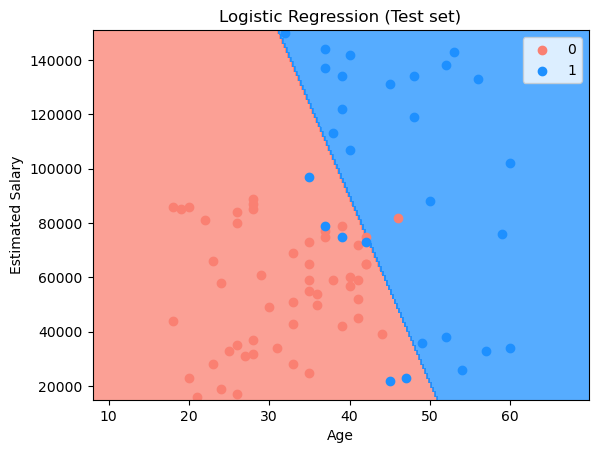

In [32]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()